# Activating Your First Artificial Neuron

In [4]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

## Using a Single Neuron for Binary Classification

### Creating Dummy Data

In [5]:
# Generate 1000 demo data samples with 2 features and two centers

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [6]:
# Transforming y to a vertical vector
y = y.reshape(-1,1)
y.shape


(1000, 1)

In [7]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=['Feature 1','Feature 2'])
df['Target'] = y
df.head()


,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


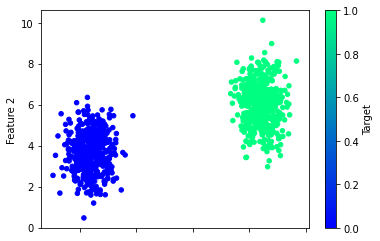

In [8]:
# Plotting the dummy data
df.plot.scatter(
    x="Feature 1",            
    y='Feature 2',
    c="Target",
    colormap='winter')


 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [9]:
from numpy.random.mtrand import random
# Create training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

 Scale the data using the `StandarScaler`.

In [10]:
# Create scaler instance

X_scaler = StandardScaler()

In [11]:
# Fit the scaler
X_scaler.fit(X_train)


StandardScaler()

In [12]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


 ### Neural Network Model Creation

In [13]:
# Create a sequential model
neuron = Sequential()


The initial step is to add the first layer of our neural network.

![First Layer](https://github.com/Aqui1983/Module_13_Activities/blob/main/13.1%20Activity_files/01-Evr_Keras_Intro/Images/tensorflow-neuron-layer-1.png?raw=1)

In [14]:
# First layer
number_imputs = 2
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_imputs))


We finish creating our neural network by adding the output layer.

![Output layer](https://github.com/Aqui1983/Module_13_Activities/blob/main/13.1%20Activity_files/01-Evr_Keras_Intro/Images/tensorflow-neuron-output-layer.png?raw=1)

In [15]:
# Output layer

number_classes=1
neuron.add(Dense(units=number_classes, activation='sigmoid'))

In [16]:
# Model summary

neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


 ### Compile the Model

In [17]:
# Compile model

neuron.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

 ### Fit the Model

In [18]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7119 - accuracy: 0.3373
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.3533
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.3907
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.3987
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.4147
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4293
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4373
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4520
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4600
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4693
Epoch 11/

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

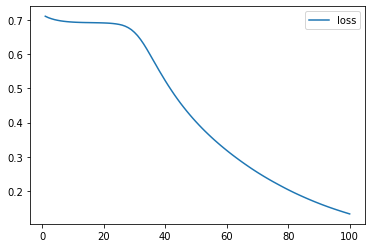

In [19]:
# Create a dataframe with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history['loss'])+1))

# Plot the loss
df.plot(y='loss')


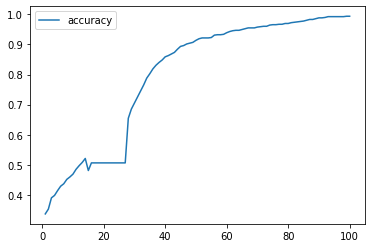

In [20]:
# Plot the accuracy
df.plot(y='accuracy')


 #### Evaluating the Model Using Testing Data

In [21]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = neuron.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, and accuracy is:{model_accuracy}")


8/8 - 0s - loss: 0.1055 - accuracy: 1.0000 - 158ms/epoch - 20ms/step
Loss: 0.10545393079519272, and accuracy is:1.0


 ### Making Predictions with New Data

In [22]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)


In [23]:
# Making predictions
predictions = (neuron.predict(new_X)>0.5).astype('int32')
results = pd.DataFrame({
    "Predictions":predictions.ravel(),
    "Actuals":new_y
})
results

1/1 [==============================] - 0s 77ms/step


,Predictions,Actuals
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


 ## Using a Single Neuron for Non-Linear Data

 ### Creating Demo Data

In [25]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, n_features=2, random_state=78)


TypeError: ignored

In [ ]:
# Transforming y_moons to a vertical vector

y_moons = y_moons.reshape(-1,1)

In [ ]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])


In [ ]:
# Plotting the non-linear dummy data
df_moons.plot(
    x='Feature 1',
    y='Feature 2',
    c='Target',
    colormap='winter'
)


 ### Data Preprocessing

 Use `train_test_split` to create training and testing data.

In [ ]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)


 Scale the data

In [ ]:
# Create the scaler instance
X_moon_scaler = StandardScaler()


In [ ]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)


In [ ]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


 ### Fit the Model

In [1]:
# Training the model with the non-linear data
moon_model = neuron.fit(X_moon_train_scaled, y_moon_train, epochs=100)


NameError: ignored

 ### Evaluate the Model

 #### Plotting the Loss Function and Accuracy

In [ ]:
# Create a dataframe with the history dictionary


# Plot the loss



In [ ]:
# Plot the accuracy



 #### Evaluating the Model Using Testing Data

In [ ]:
# Evaluate the model using non-linear data



 ### Making Predictions

In [ ]:
# Create demo data



In [ ]:
# Making predictions

